In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

In [4]:
data_train = pd.read_csv("data/train.csv")
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data_train = data_train.replace(['female','male'],[0,1])
data_train = data_train.replace(['S','C','Q'],[0,1,2])
data_train = data_train.fillna(10)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,10,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,10,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,10,0.0


In [6]:
X_train = np.array(data_train[['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch']])
Y_train = np.array(data_train[['Survived']])

Model Train Tensorflow

In [7]:
model = tf.keras.models.Sequential([
    Dense(512 , activation='relu'),
    Dense(256 , activation='relu'),
    Dense(128 , activation='relu'),
    Dense(2 , activation='softmax'),
])


In [8]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              loss = tf.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy']
              )

In [9]:
train_output = model.fit(X_train, Y_train ,epochs=200)

Epoch 1/200
28/28 [==============================] - 2s 4ms/step - loss: 1.4925 - accuracy: 0.5499
Epoch 2/200
28/28 [==============================] - 0s 4ms/step - loss: 0.6164 - accuracy: 0.6768
Epoch 3/200
28/28 [==============================] - 0s 4ms/step - loss: 0.5038 - accuracy: 0.7710
Epoch 4/200
28/28 [==============================] - 0s 4ms/step - loss: 0.5015 - accuracy: 0.7901
Epoch 5/200
28/28 [==============================] - 0s 4ms/step - loss: 0.4685 - accuracy: 0.8103
Epoch 6/200
28/28 [==============================] - 0s 4ms/step - loss: 0.5072 - accuracy: 0.7912
Epoch 7/200
28/28 [==============================] - 0s 5ms/step - loss: 0.4790 - accuracy: 0.7969
Epoch 8/200
28/28 [==============================] - 0s 5ms/step - loss: 0.4569 - accuracy: 0.8047
Epoch 9/200
28/28 [==============================] - 0s 6ms/step - loss: 0.4382 - accuracy: 0.8148
Epoch 10/200
28/28 [==============================] - 0s 5ms/step - loss: 0.4287 - accuracy: 0.8182
Epoch 11/

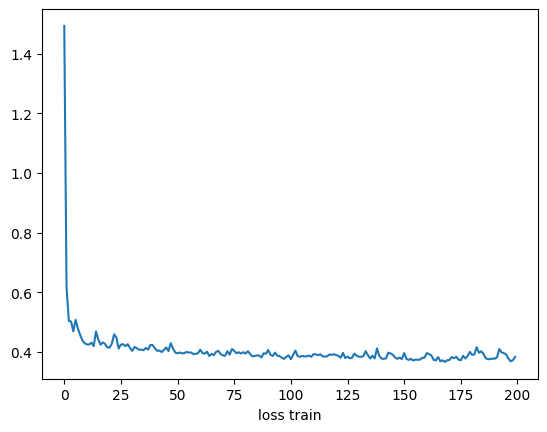

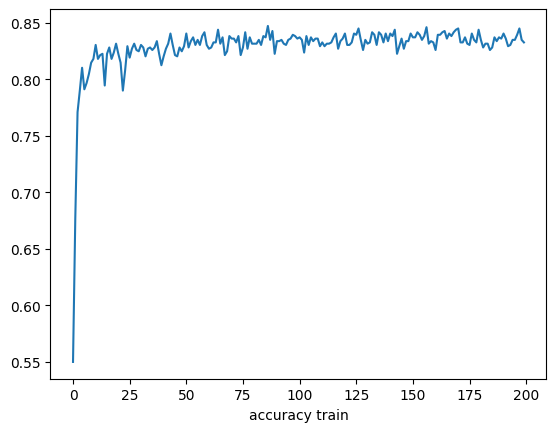

In [22]:
plt.plot(train_output.history['loss'])
plt.xlabel("loss train")
plt.show()
plt.plot(train_output.history['accuracy'])
plt.xlabel("accuracy train")
plt.show()

In [12]:
data_test = pd.read_csv("data/test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
data_test = data_test.replace(['female','male'],[0,1])
data_test = data_test.replace(['S','C','Q'],[0,1,2])
data_test = data_test.fillna(10)
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,10,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,10,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,10,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,10,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,10,0


Model TEST

In [14]:
X_test = np.array(data_train[['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch']])
Y_test = np.array(data_train[['Survived']])

results = model.evaluate(X_test, Y_test)
print("accuracy : ", results[1])

28/28 [==============================] - 1s 5ms/step - loss: 0.3675 - accuracy: 0.8429
accuracy :  0.8428731560707092


In [15]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, Y_train)

Y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred.round())
accuracy


0.8720538720538721

MLP advanced

In [16]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)
clf.predict_proba(X_test)

clf.predict(X_test)

accuracy = clf.score(X_test, Y_test)
accuracy

c:\Users\98915\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8305274971941639

Perceptron

In [17]:
p = Perceptron(random_state=42)
p.fit(X_train, Y_train)

Y_pred = p.predict(X_test)
test_score = accuracy_score(Y_test, Y_pred)
print("score on train data: ", test_score)

score on train data:  0.7968574635241302


c:\Users\98915\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test


In [18]:
jack = np.array([[1,1,36,0,0]])
result = model.predict(jack)
np.argmax(result)

1/1 [==============================] - 0s 315ms/step


0